**1. Data Pre-processing:**
Before building the neural network model, it's essential to perform proper data pre-processing to ensure that your data is ready for training. Below are some steps you can follow:

Loading the Dataset: You mentioned using a hand sign dataset, which you have already downloaded and extracted using wget. Make sure the dataset is in the correct format (images and labels).

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

#Load datasets to local storages.
if not os.path.exists('data/extracted_data/hand_sign_datasets'):
    !rm -rf hand_sign_datasets.7z # Remove any existing file with the same name
    !wget "https://github.com/lesterchia1/hand_sign_datasets/raw/main/hand_sign_datasets.7z" # Download the 7z file
    !apt-get install -y p7zip-full # Install p7zip if it's not already installed
    !7z x hand_sign_datasets.7z -odata/extracted_data # Extract the 7z file
else:
    print("Directory 'hand_sign_datasets' already exists.")

# Clear any previous model from memory
K.clear_session()


# Check if the dataset directory exists
dataset_dir = 'data/extracted_data/hand_sign_datasets'

# List the contents of the directory to confirm its structure
print("Checking contents of the extracted directory:")
for root, dirs, files in os.walk(dataset_dir):
    print(root)

# Update directories based on the actual dataset structure
train_dir = os.path.join(dataset_dir, 'Train')  # Assuming 'Train' folder exists
val_dir = os.path.join(dataset_dir, 'Val')  # Assuming 'Val' folder should be there

# Check if the validation directory exists
if not os.path.exists(val_dir):
    print(f"Validation directory '{val_dir}' not found. Checking for alternative directories...")
    # You can handle different cases here based on your dataset structure
    # For example, use 'Test' as the validation set if 'Val' does not exist
    val_dir = os.path.join(dataset_dir, 'Test')  # Try using 'Test' as validation directory

# Now you can confirm the train and validation directories
print("Training directory:", train_dir)
print("Validation directory:", val_dir)

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),  # Resize all images to 28x28 pixels
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)


Directory 'hand_sign_datasets' already exists.
Checking contents of the extracted directory:
data/extracted_data/hand_sign_datasets
data/extracted_data/hand_sign_datasets/Train
data/extracted_data/hand_sign_datasets/Train/D
data/extracted_data/hand_sign_datasets/Train/B
data/extracted_data/hand_sign_datasets/Train/C
data/extracted_data/hand_sign_datasets/Train/A
data/extracted_data/hand_sign_datasets/Train/X
data/extracted_data/hand_sign_datasets/Train/N
data/extracted_data/hand_sign_datasets/Train/V
data/extracted_data/hand_sign_datasets/Train/I
data/extracted_data/hand_sign_datasets/Train/W
data/extracted_data/hand_sign_datasets/Train/O
data/extracted_data/hand_sign_datasets/Train/E
data/extracted_data/hand_sign_datasets/Train/H
data/extracted_data/hand_sign_datasets/Train/G
data/extracted_data/hand_sign_datasets/Train/K
data/extracted_data/hand_sign_datasets/Train/L
data/extracted_data/hand_sign_datasets/Train/Y
data/extracted_data/hand_sign_datasets/Train/R
data/extracted_data/hand

Normalizing Data: Normalize the pixel values (e.g., rescale from 0-255 to 0-1), which helps in better convergence and stability during training.

**2. Model Architecture:**

You will develop a fully-connected feedforward neural network, with several hidden layers. Below is the Keras code to build your model.

In [ ]:
# Assuming you're using a CNN architecture for image classification
from tensorflow.keras import layers, models



# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output for Dense layers
    layers.Flatten(),
    # Add the output layer with the correct number of classes (24)
    layers.Dense(24, activation='softmax')  # 24 classes for hand sign classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



**3. Model Training:**
You can now train the model using the prepared training and validation data generators.

**3a. Train the model**

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)


Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - accuracy: 0.1080 - loss: 2.9627 - val_accuracy: 0.4583 - val_loss: 1.7762
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.3429 - loss: 2.0910 - val_accuracy: 0.5039 - val_loss: 1.3951
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - accuracy: 0.4472 - loss: 1.7335 - val_accuracy: 0.5756 - val_loss: 1.2294
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - accuracy: 0.5389 - loss: 1.4638 - val_accuracy: 0.7153 - val_loss: 0.9006
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.5825 - loss: 1.3015 - val_accuracy: 0.7199 - val_loss: 0.7991
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.6208 - loss: 1.1804 - val_accuracy: 0.7458 - val_loss: 0.6871
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.6572 - loss: 1.0553 - val_accuracy: 0.7929 - val_loss: 0.5900
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6843 - loss: 0.9779 - 

**3b1: Plot training and validation accuracy.**

**3b2: Plot training and validation loss.**

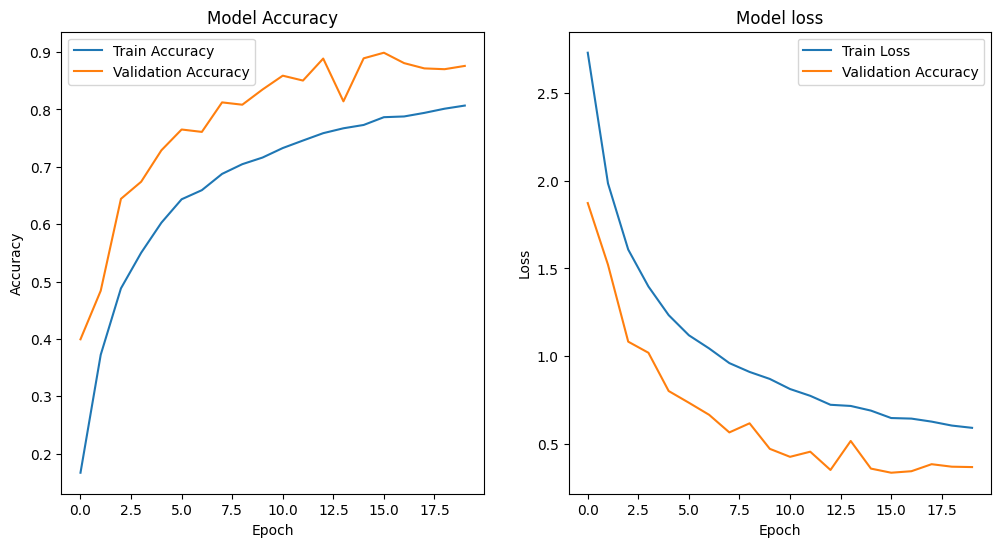

In [ ]:
import matplotlib.pyplot as plt

#assuming 'history' is the result of model.fit()

#plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


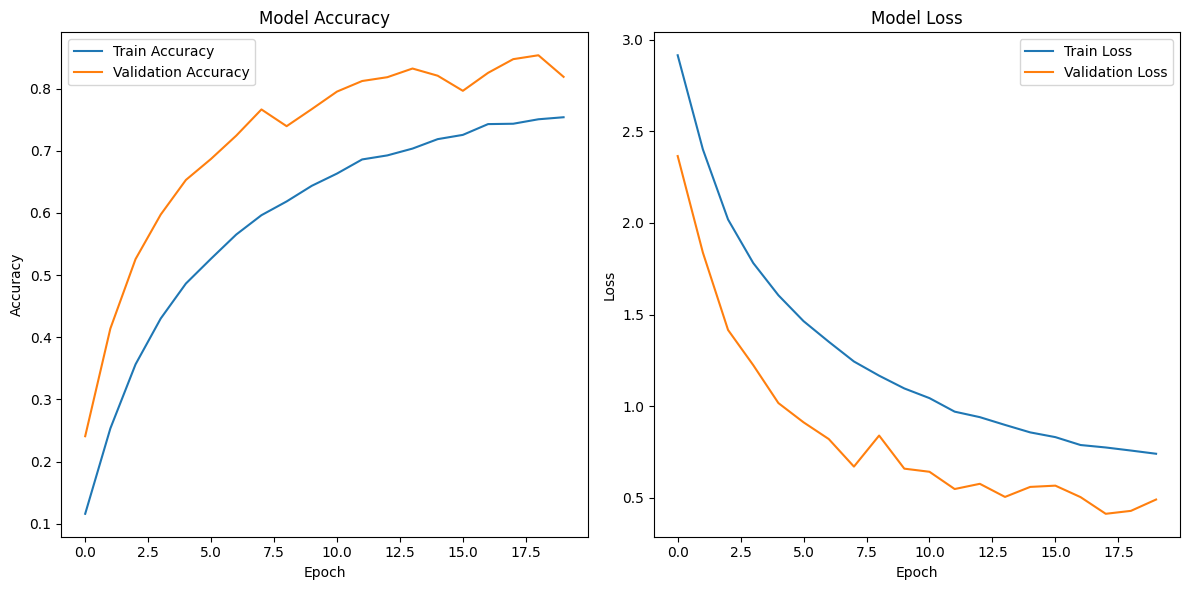

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**4. Evaluation:**
After training, evaluate the model on validation data to see its performance.

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8223 - loss: 0.4769
Validation Loss: 0.49021753668785095, Validation Accuracy: 0.8188789486885071


**5. Fine-tuning for Performance:**
Fine-tuning involves adjusting hyperparameters and model components to achieve the best performance. Here are some aspects to tune:

Number of Layers and Neurons: You can experiment with more or fewer neurons in the hidden layers, or add more hidden layers.
Regularization: Using L2 regularization (like in the model above) can help prevent overfitting.
Activation Functions: ReLU is commonly used, but experimenting with others like LeakyReLU or Swish could improve performance.
Optimization Algorithms: Adam is widely used, but trying SGD or RMSprop may yield different results.
Weight Initialization: Try different initialization strategies like He or Glorot initialization for better convergence.

**6. Prediction:**
Once the model is trained, you can use it to predict on new images.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an example image for prediction
img_path = 'data/extracted_data/hand_sign_datasets/Test'
img = image.load_img(img_path, target_size=(28, 28))  # Resize the image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the class index with the highest probability

# Map the predicted class index to the corresponding label (A to Y)
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']
predicted_label = class_labels[predicted_class]

print(f"Predicted label: {predicted_label}")


IsADirectoryError: [Errno 21] Is a directory: 'data/extracted_data/hand_sign_datasets/Test'

**7. Discussion on Model Development:**

Fully-connected feedforward neural networks (FFNN): In FFNNs, every neuron is connected to every other neuron in the next layer. This can be computationally intensive but effective for many tasks, including classification problems like hand sign recognition. However, FFNNs can struggle with spatial hierarchies and features present in image data, as each pixel is treated independently.
Convolutional Neural Networks (CNNs): CNNs are better suited for image data because they exploit the spatial structure of the images using convolutional layers. They are more efficient than FFNNs in terms of parameters and are widely used for image classification tasks.
Recurrent Neural Networks (RNNs): RNNs are typically used for sequential data, such as time-series or language models. They are not well-suited for image classification tasks, where CNNs are preferred due to their ability to learn spatial relationships.

**8. Conclusion:**

For your hand sign recognition task, CNNs would typically outperform FFNNs due to their ability to learn spatial features in images.
However, FFNNs can still serve as a good starting point, especially when computational resources are limited.
By following the steps above, you can develop a fully connected neural network model using Keras to classify hand signs. Fine-tuning and experimenting with different architectures and hyperparameters will help you achieve better performance.